In [8]:
from google.colab import files
files.upload()

Saving sub_dataset.zip to sub_dataset.zip


In [9]:
import zipfile

unzip = zipfile.ZipFile("sub_dataset.zip")
unzip.extractall()
unzip.close()

In [107]:
train_dir = "sub_dataset/train/"
test_dir = "sub_dataset/test/"

In [11]:
import tensorflow as tf


In [108]:
# processing the dataset

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.0)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.0)


In [109]:

train_data = train_data_gen.flow_from_directory(train_dir,
                                          target_size = (224,224),
                                          class_mode = "categorical"
                                          )
test_data = test_data_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         )

Found 150 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [110]:
for total_num_flowers, total_class in train_data:
  print(total_num_flowers.shape)
  print(total_class.shape)
  break

(32, 224, 224, 3)
(32, 5)


In [25]:
# import mobilenet from tfhub.dev

mobilenet_model = tf.keras.applications.MobileNetV2( input_shape=(224,224,3))

14548992/14536120 [==============================] - 0s 0us/step


In [61]:
# image prediction
image_prediction = mobilenet_model.predict(total_num_flowers)

image_prediction.shape

(32, 1000)

In [27]:
# imagenet labels
import numpy as np

label_path = tf.keras.utils.get_file("imagenet.txt", "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")

imagenet_labels = np.array(open(label_path).read().splitlines())


24576/10484 [======================================================================] - 0s 0us/step


In [62]:
# class prediction 

predicted_class = imagenet_labels[np.argmax(image_prediction, axis = -1)]

predicted_class


array(['rapeseed', 'acorn', 'rapeseed', 'buckeye', 'cardoon', 'fly',
       'pop bottle', 'face powder', 'vacuum', 'buckeye', 'rapeseed',
       'nematode', 'rapeseed', 'cliff', 'rapeseed', 'plow', 'rapeseed',
       'rapeseed', 'rapeseed', 'rapeseed', 'vault', 'pickelhaube',
       'pickelhaube', 'rapeseed', 'scuba diver', 'bell pepper',
       'rapeseed', 'pickelhaube', 'rapeseed', 'pickelhaube', 'rapeseed',
       'rapeseed'], dtype='<U30')

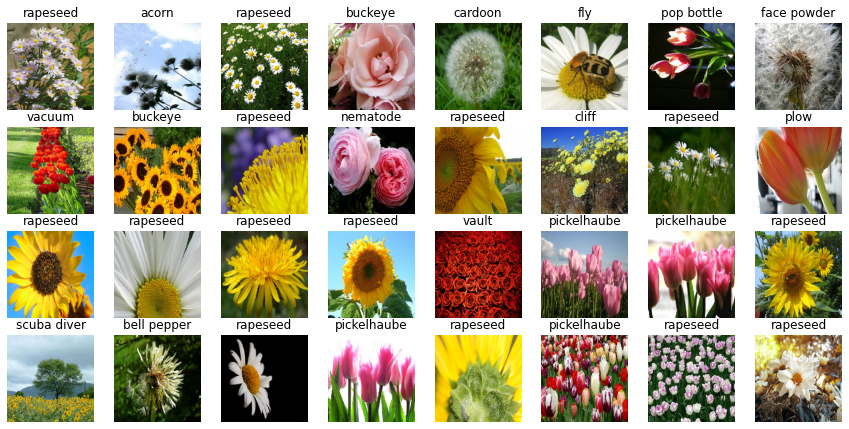

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

for i in range(32):
  plt.subplot(8,8,i+1)
  plt.imshow(total_num_flowers[i])
  plt.title(predicted_class[i])
  plt.axis("off")


##**Upadating the model using transfer learning**

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

In [111]:
# import mobilenet model

base_model = tf.keras.applications.MobileNetV2(include_top= False, weights="imagenet")
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3))

x = base_model(inputs)
# x = layers.Dense(200, activation="relu")(x)
# x = layers.Dense(200, activation="relu")(x)
# x = layers.Dense(200, activation="relu")(x)
# x = layers.Dense(100, activation="relu")(x)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(5, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)


# compiling the model

model.compile(
    loss= tf.keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)


# fitting the model

model.fit(train_data,
          epochs = 10,
          validation_data = test_data
          )




Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 1.9317 - accuracy: 0.1867 - val_loss: 1.6179 - val_accuracy: 0.2900
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 1.3543 - accuracy: 0.3733 - val_loss: 1.3671 - val_accuracy: 0.4300
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.9743 - accuracy: 0.6933 - val_loss: 1.1249 - val_accuracy: 0.5700
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.7436 - accuracy: 0.8333 - val_loss: 0.9809 - val_accuracy: 0.6400
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.5700 - accuracy: 0.8533 - val_loss: 0.9108 - val_accuracy: 0.6600
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.4641 - accuracy: 0.9200 - val_loss: 0.8739 - val_accuracy: 0.6700
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.3881 - accuracy: 0.9400 - val_loss: 0.8435 - val_accuracy: 0.7000
Epoch 8/10
5/5 [========================

In [113]:
model_evaluate = model.evaluate(test_data)

4/4 [==============================] - 3s 655ms/step - loss: 0.7591 - accuracy: 0.7600


In [112]:
model.layers

In [114]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f02c7996590>
1 <keras.layers.convolutional.Conv2D object at 0x7f02cc89e7d0>
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f02c83a1f50>
3 <keras.layers.advanced_activations.ReLU object at 0x7f02c6d52610>
4 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f02c6d52f50>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f02cc88c510>
6 <keras.layers.advanced_activations.ReLU object at 0x7f02cc881c50>
7 <keras.layers.convolutional.Conv2D object at 0x7f02cc86ef90>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f02c6d52f10>
9 <keras.layers.convolutional.Conv2D object at 0x7f02cc82fd10>
10 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f02cc868650>
11 <keras.layers.advanced_activations.ReLU object at 0x7f02cc89f310>
12 <keras.layers.convolutional.ZeroPadding2D object at 0x7f02cc8526d0>
13 <keras.layers.

In [115]:
# number of layers in the base model

len(base_model.layers)

154

##**Tunning the model**

In [117]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
    metrics = ["accuracy"]
)

# fitting data to model

model.fit(train_data,
         
          epochs = 10,
          validation_data= test_data
)


Epoch 1/10
5/5 [==============================] - 14s 2s/step - loss: 0.4986 - accuracy: 0.8733 - val_loss: 0.7611 - val_accuracy: 0.7400
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.1542 - accuracy: 0.9867 - val_loss: 0.7613 - val_accuracy: 0.7400
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.7662 - val_accuracy: 0.7200
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.7727 - val_accuracy: 0.7700
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.7753 - val_accuracy: 0.7700
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.7774 - val_accuracy: 0.7700
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.7804 - val_accuracy: 0.7700
Epoch 8/10
5/5 [==================

In [118]:
model_evaluate = model.predict(test_data)

In [119]:
# test data prediction

for test_num_flower, test_class in test_data:
  print(test_num_flower.shape)
  print(test_class.shape)
  break

(32, 224, 224, 3)
(32, 5)


In [120]:
test_flower_prediction = model.predict(test_num_flower)

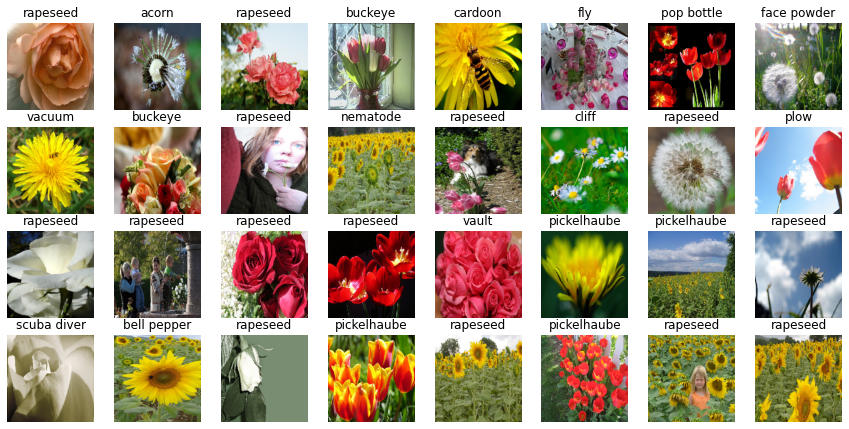

In [126]:
plt.figure(figsize=(15,15))
for i in range(32):
  plt.subplot(8,8, i+1)
  plt.imshow(test_num_flower[i])
  plt.title(predicted_class[i])
  plt.axis("off")